<a href="https://colab.research.google.com/github/G-Shillcock/Division_of_Labour/blob/main/DoL_AnimateContour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-71f511e2f7f9>:57: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(a_values[frame], b_values[frame])  # Update the point's position


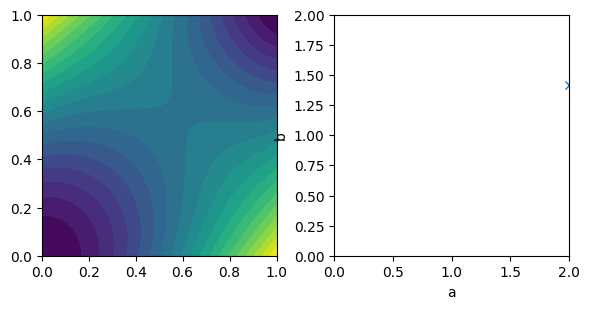

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def performance(effort, task_difficulty):
    return effort ** task_difficulty

def fitness(x, a, b, λ):
    t1, t2 = x
    A1 = performance(t1, a)
    A2 = performance(t2, a)
    B1 = performance(1 - t1, b)
    B2 = performance(1 - t2, b)
    return (1 - λ) * (A1 * B1 + A2 * B2) + λ * (A1 * B2 + A2 * B1)

# Define parameter values
a_values = np.linspace(0.1, 2, 40)  # Values of 'a' for animation
b_values = np.sqrt(np.linspace(0.1, 2, len(a_values)))
λ = 0.5

# Create a meshgrid for t1 and t2
t1_range = np.linspace(0, 1, 100)
t2_range = np.linspace(0, 1, 100)
t1_grid, t2_grid = np.meshgrid(t1_range, t2_range)

# Create a figure and axis
fig, ax = plt.subplots(1,2,figsize = (6,3))

# plt.subplots_adjust(wspace=0.4)  # Adjust the value as needed
plt.tight_layout()

ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[0].set_xlabel('t1')
ax[0].set_ylabel('t2')

ax[1].set_xlim(0,2)
ax[1].set_ylim(0,2)
ax[1].set_xlabel('a')
ax[1].set_ylabel('b')

# Initialize an empty contour plot
contour = ax[0].contourf(t1_grid, t2_grid, fitness([t1_grid, t2_grid], a_values[0], b_values[0], λ), levels=20)
point, = ax[1].plot([], [], 'x')  # Create an empty point plot

# Function to initialize the point plot
def init():
    point.set_data([], [])
    return point,

# Function to update the contour plot and point in each animation frame
def update(frame):
    ax[0].clear()
    contour = ax[0].contourf(t1_grid, t2_grid, fitness([t1_grid, t2_grid], a_values[frame], b_values[frame], λ), levels=20)
    # ax[0].set_title(f'a = {a_values[frame]:.2f}, b = {b_values[frame]:.2f}')

    point.set_data(a_values[frame], b_values[frame])  # Update the point's position
    return point,

# Create the animation
animation = FuncAnimation(fig, update, init_func=init, frames=len(a_values), interval=500, repeat=True)

# Save the animation as a GIF
animation.save('fitness_animation.gif', writer='pillow')

# Display the animation
plt.show()